#  Fintech Report Question 1
## Author:  Zhicheng Zhang 

In [1]:
import numpy as np
from math import exp, log
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Parameters 
## µ = 0.5%, S(0) = 100, σ = 10%, T = 0.3


In [2]:
u = 0.005
r = 0.001
S0 = 100
sigma = 0.1
T = 0.3
dt = 0.3 / 100
eta = -0.5
K = 100

# 2. Risk Adjustment
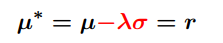

In [3]:
lam = (u - r) / sigma
u_new = u - lam*sigma

# 3. Simulation Function
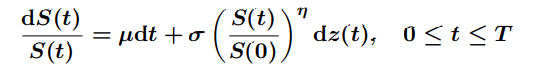

In [4]:
def sim(K, eta):
    S = [100] # price
    R = []    # return of rate
    for i in range(99):
        zt = np.random.randn(1)           # generate z(t)
        R.append(u_new*dt+sigma*(S[i]/S[0])**(eta)*zt*dt)
        S_forward = S[i] * exp(R[i])      # log(S[i+1] / S[i]) == R[i]
        if(S_forward <= K):
            S_forward = K
        S.append(S_forward)
    return R, S

R1, S1 = sim(95, -0.5)
R2, S2 = sim(100, -0.5)
R3, S3 = sim(105, -0.5)

# 4. オプションの（市場が定めた）価格は
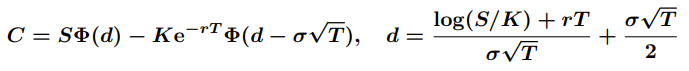

<font color=red size=5> Answer of Question 1 (1) </font> <br>
K = 95, C = 0.040063 <br>
K = 100, C = 0.059814 <br>
K = 105, C = 0.062846 <br>

In [5]:
def norm(x):
    pi = 3.1415926
    temp = (1/(2*pi)**0.5) * exp(-1*x*x/2)
    return temp

def calculate_C(S, K, r = 0.001, sigma = 0.1):
    d = (log(S/K) + r*T) / (sigma * T**0.5)
    C = S*norm(d) - K*exp(-r*T) * norm(d - sigma*(T**0.5))
    return C

C1 = calculate_C(S1[99], 95)
C2 = calculate_C(S2[99], 100)
C3 = calculate_C(S3[99], 105)

print("K = 95, C = %f" %C1)
print("K = 100, C = %f" %C2)
print("K = 105, C = %f" %C3)

K = 95, C = 0.035896
K = 100, C = 0.059762
K = 105, C = 0.062630


# 5. 収益の分布(Distribution of Rate of Return)


<font color=red size=5> Answer of Question 1 (2) </font>

Text(0.5, 1.0, 'Rate of Return Distribution')

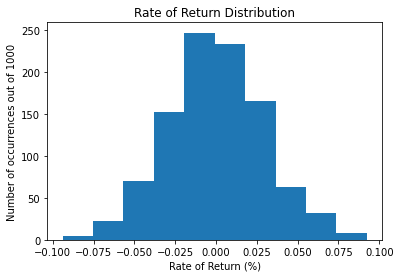

In [15]:
R = []
for i in range(1000):
    R4, S4 = sim(100, 0.8)
    R.append(R4[-1].item()*100)
plt.hist(R)
plt.xlabel("Rate of Return (%)")
plt.ylabel("Number of occurrences out of 1000")
plt.title("Rate of Return Distribution")